## Making a Neural Network: Cats and Dogs ##

Lillian Ellis, Final Project, Big Data and Analytics Final Project Fall 2018 

For my final project, I decided to create a neural network! The neural network I created determines whether an image is of a cat and dog. Throughout this lab, I greatly reffered to https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8 this tutorial, done by author Venkatesh Tata. All of my code came from that tutorial, with the exeption of only a few minor edits I made by myself. Throughout the tutorial, Venkatesh provides a great explaination for what a neural network is, and provides some great basics surrounding how to get started building and training one. 

This tutorial provided me with 2 sets to download (test and training):

Test Set: cat and dog folders, each containing 2000

Training Set: cat and dog folders, 8000 images for each (cat and dog)

I used Keras, out of anaconda-navigator, to create the neural network! I used Keras to form, build, train, and test my network. 

In [101]:
# Importing the Keras libraries and packages to build CNN

#Sequential initilizes the neural network as a sequential network (2 basic ways: sequence of layers or a graph)
from keras.models import Sequential
#used to perform convolution operation on the training images (makes everything 2D)
from keras.layers import Conv2D
#used for step 3: pooling operation, Maxpooling gives the max pixel value of a "region of interest"- provides us the
#maximum amount of data for each image the network reads in and evaluates. 
from keras.layers import MaxPooling2D
#flatten converts all of the 2D arrays into a line vector
from keras.layers import Flatten
#dense preforms full connection of neural network 
from keras.layers import Dense
#this imports the image so my network can process it and display it 
from keras.preprocessing.image import ImageDataGenerator

In [87]:
#creating an object for sequential class (sequence of layers- instead of a graph--> a neural network can also be 
#installed with a graph)
classifier = Sequential()

In [88]:
#now performing the convolution step 
#takes 4 arguments, filters, shape of filter, input shape and type of image (3 = RGB colors), and activation function 
#'relu' = rectifier function
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [89]:
#pooling images to reduce the sizes of images
#take a 2x2 matrix here (minimum pixel loss without reducing importance)
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [90]:
#with the flatten function: taking the 2-D array, and pooling it into a single one-dimensional vector 
#so network can read in data 
classifier.add(Flatten())

In [91]:
#this is the 'hidden network'
#the dense function adds a fully connected layer - this defines the number of nodes that are used in the 
#hidden layer: defines number of inputs and outputs used 
classifier.add(Dense(units = 128, activation = 'relu'))

In [92]:
#output layer, defines the output as a single binary (cat or dog (1 or 0))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [93]:
#compiling the CNN
#optimizer = gradient algorithm, loss = for loss function, metric = chooses performance metric
    #so, this step basically instructs what the network should provide as it learns (accuracy, loss, etc.)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
#image augmentations - synthesizes training data (64x64)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2814 images belonging to 2 classes.
Found 1106 images belonging to 2 classes.


The most effective way to improve my code was to test more images and more epochs (so it has more exposure and learns more of what's right and wrong). As I increased both my epochs and steps-per-epoch, I greatly increased the accuracy score of my neural network. 

**Steps Per Epoch:** number of training images I want to test 

**Epoch:** single step in training a network, so the amount of times it runs through each test. Each time, the accuracy shoudl improve as the data runs through each epoch

In [223]:
#fitting the data to model 
classifier.fit_generator(training_set,
steps_per_epoch = 800,
epochs = 20,
validation_data = test_set,
validation_steps = 300)

Epoch 1/20
800/800 [==============================] - 939s 1s/step - loss: 0.0309 - acc: 0.9900 - val_loss: 2.1261 - val_acc: 0.7148
Epoch 2/20
800/800 [==============================] - 193s 241ms/step - loss: 0.0238 - acc: 0.9923 - val_loss: 2.0686 - val_acc: 0.7106
Epoch 3/20
800/800 [==============================] - 2682s 3s/step - loss: 0.0271 - acc: 0.9913 - val_loss: 2.4557 - val_acc: 0.7151
Epoch 4/20
800/800 [==============================] - 224s 279ms/step - loss: 0.0248 - acc: 0.9927 - val_loss: 2.4407 - val_acc: 0.7013
Epoch 5/20
800/800 [==============================] - 198s 247ms/step - loss: 0.0219 - acc: 0.9930 - val_loss: 2.4012 - val_acc: 0.6939
Epoch 6/20
800/800 [==============================] - 724s 906ms/step - loss: 0.0255 - acc: 0.9921 - val_loss: 2.2263 - val_acc: 0.7176
Epoch 7/20
800/800 [==============================] - 192s 240ms/step - loss: 0.0271 - acc: 0.9909 - val_loss: 2.4130 - val_acc: 0.7110
Epoch 8/20
381/800 [=============>................] -

KeyboardInterrupt: 

**Part 3: Making New Predictions**

Now that my network is trained, I can make predictions with new trained model. 

Now, I test my machine! I am feeding in my first cat picture and testing to whether it's a cat or a dog

In [97]:
import numpy as np
from keras.preprocessing import image
#display image from computer with .display method
#import Image
from IPython.display import Image

In [219]:
#calling which photo to test
first_cat = 'test_set/dogs/dog.scout4.jpg'

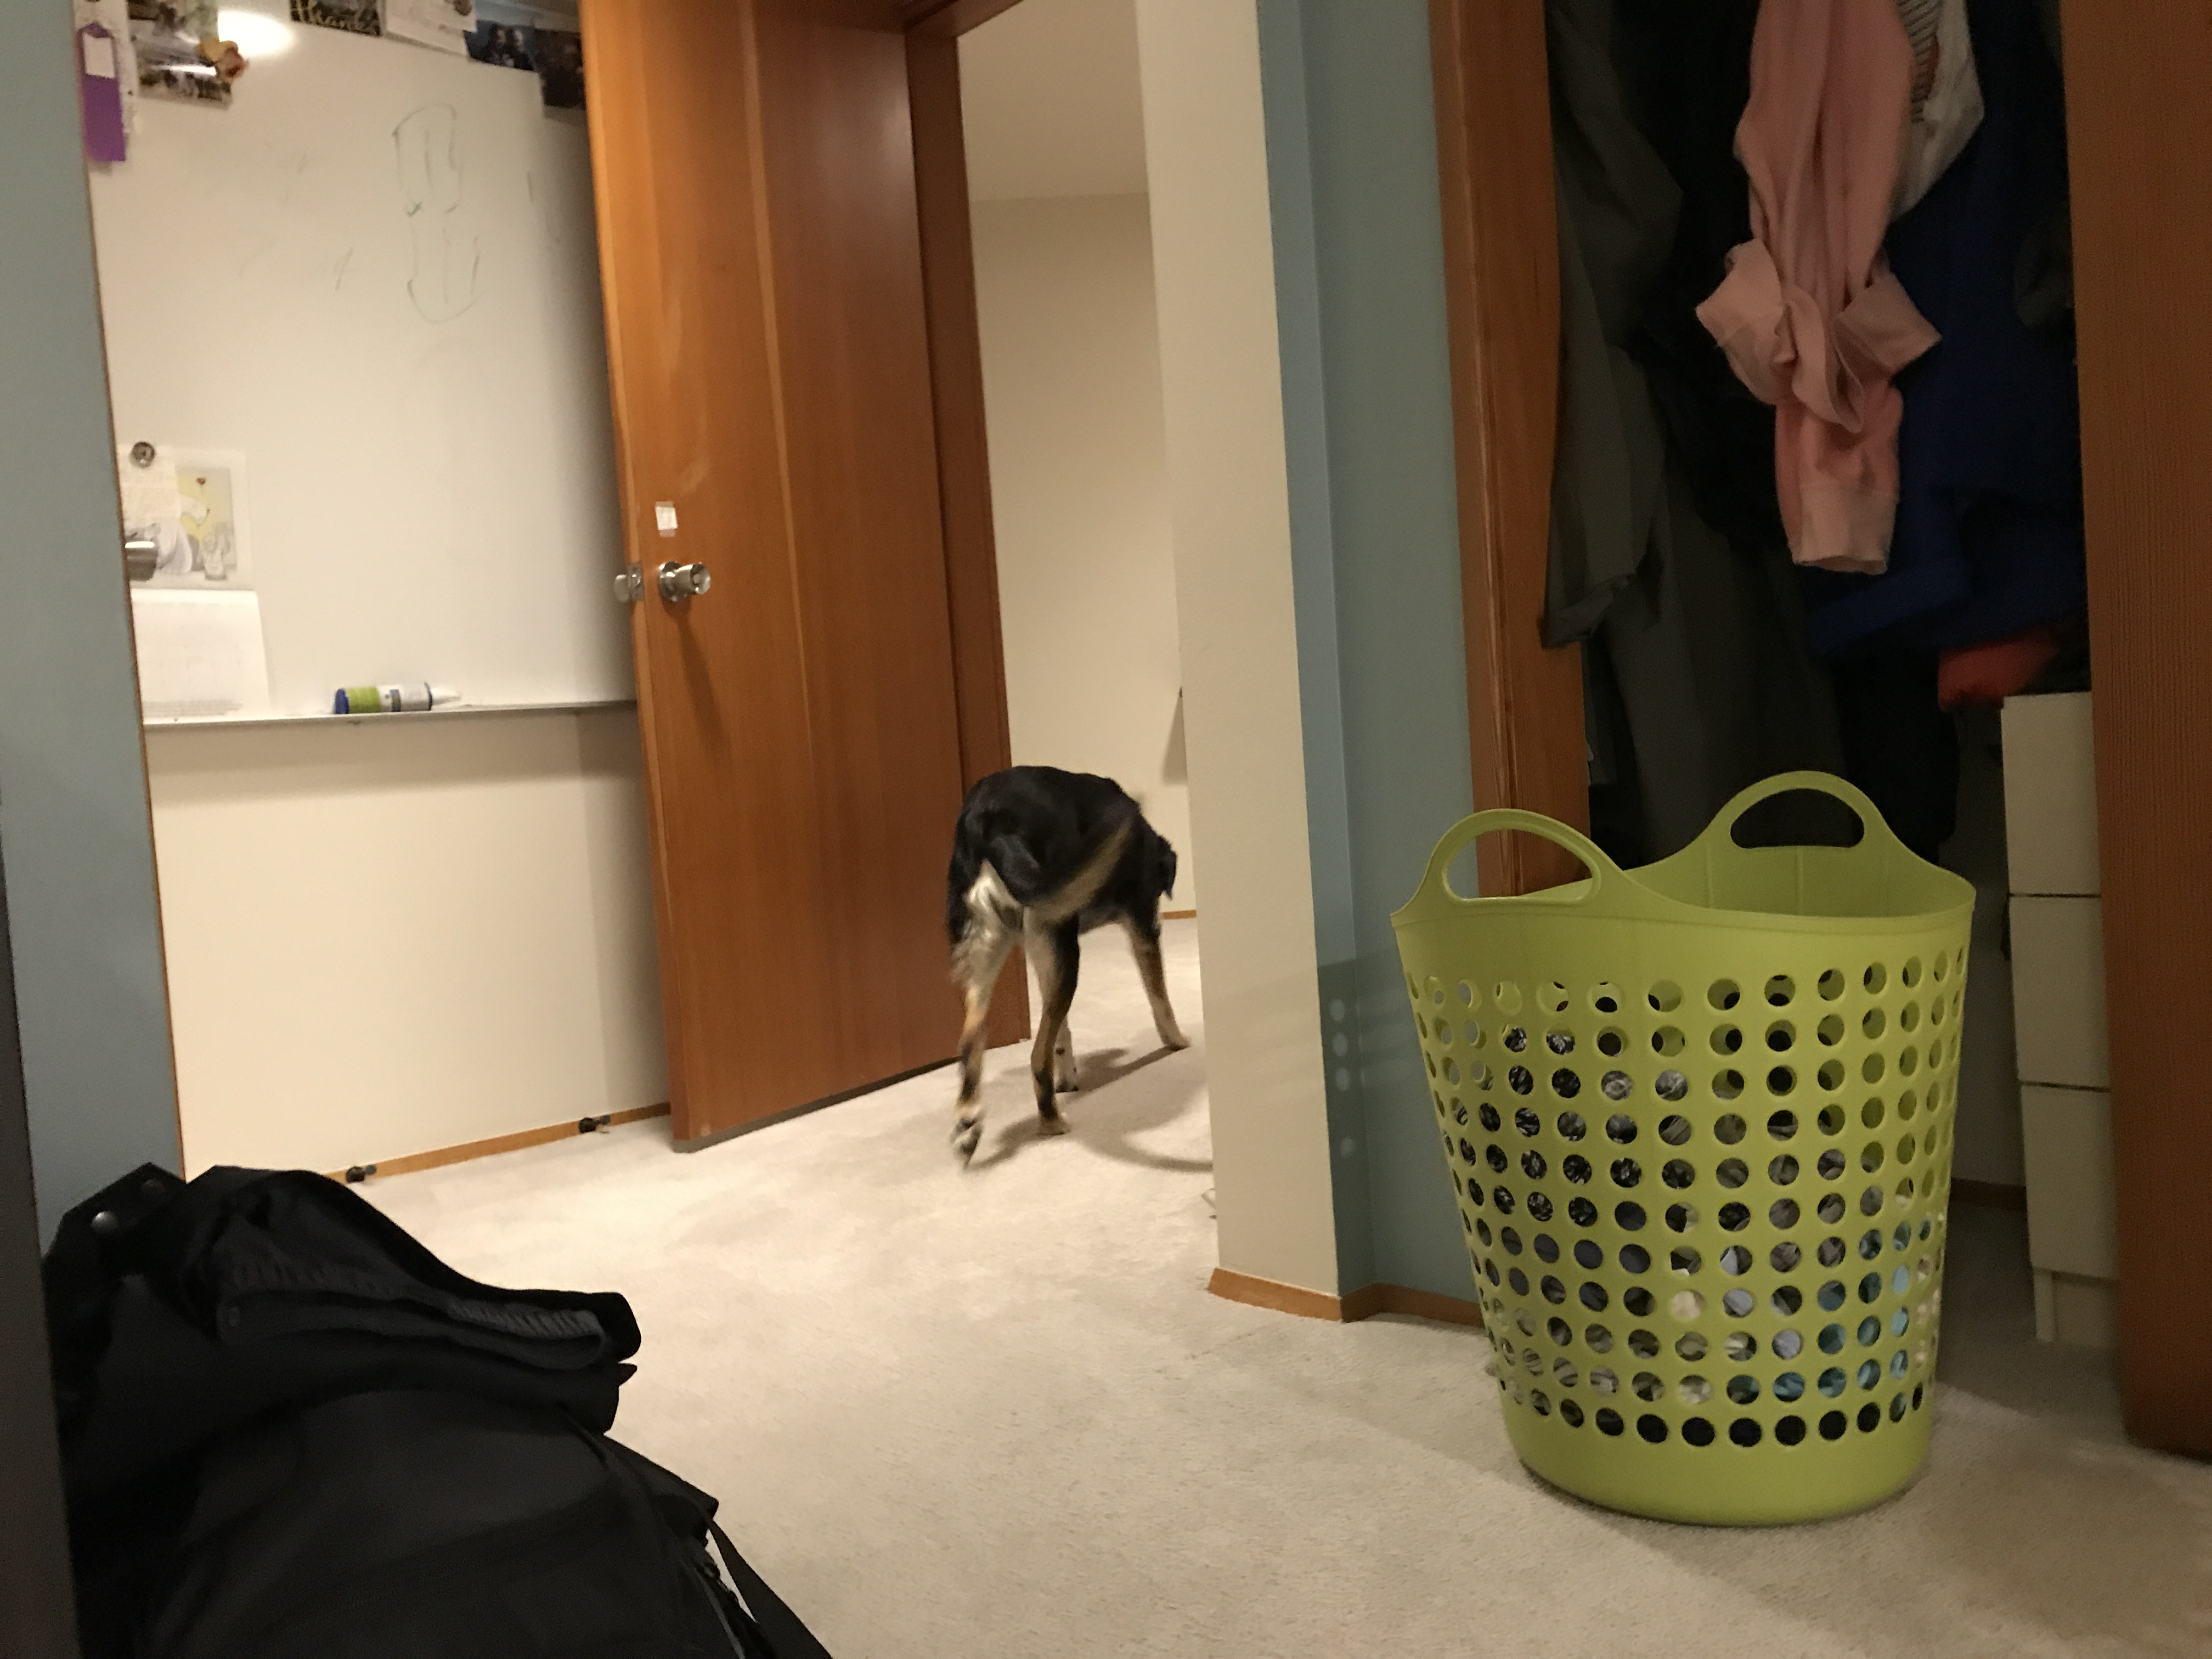

In [220]:
#printing photo 
first_cat_pic = Image(filename= first_cat, width=200, height=200)
first_cat_pic

In [221]:
#converting to resolution 64x64
#using the predict function on the classifier to get a prediction
#recieving either a 0 or 1 --> cat or dog
test_image = image.load_img(first_cat, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = print('dog')
else:
    prediction = print('cat')

dog


**Areas of Future Exploration:**

In the future, I would love to...
- Make a network that differentiated between more than 2 options (not binary options)
- Create a network that was able to look at more complicated objects
- Explore/Further understand the math going on in the "hidden layer" with all of the matrix multiplication 

**Acknowledgments:**

**https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8**

I HEAVILY used the above source, and formed most of my code around their tutorial :)

Also, a thanks to Ms. Sconyers for telling me to run more epochs and steps-per-epoch!